<a href="https://colab.research.google.com/github/Ashiq11/-NodeJS-eCommerce-site/blob/master/House_Price_pridiction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, concatenate
from tensorflow.keras import Input
from collections import Counter

# Dataset

In [2]:
!unzip "/content/drive/MyDrive/Neighborhood_Commonsense-V1.0/Datasets/House Prices and Images.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/socal2/socal_pics/5499.jpg  
  inflating: /content/dataset/socal2/socal_pics/55.jpg  
  inflating: /content/dataset/socal2/socal_pics/550.jpg  
  inflating: /content/dataset/socal2/socal_pics/5500.jpg  
  inflating: /content/dataset/socal2/socal_pics/5501.jpg  
  inflating: /content/dataset/socal2/socal_pics/5502.jpg  
  inflating: /content/dataset/socal2/socal_pics/5503.jpg  
  inflating: /content/dataset/socal2/socal_pics/5504.jpg  
  inflating: /content/dataset/socal2/socal_pics/5505.jpg  
  inflating: /content/dataset/socal2/socal_pics/5506.jpg  
  inflating: /content/dataset/socal2/socal_pics/5507.jpg  
  inflating: /content/dataset/socal2/socal_pics/5508.jpg  
  inflating: /content/dataset/socal2/socal_pics/5509.jpg  
  inflating: /content/dataset/socal2/socal_pics/551.jpg  
  inflating: /content/dataset/socal2/socal_pics/5510.jpg  
  inflating: /content/dataset/socal2/socal_pics/5511.jpg  
  inflati

In [3]:
df=pd.read_csv('./dataset/socal2.csv')
print(df.head())

   image_id                 street             citi  ...  bath  sqft   price
0         0  1317 Van Buren Avenue  Salton City, CA  ...   2.0  1560  201900
1         1         124 C Street W      Brawley, CA  ...   2.0   713  228500
2         2        2304 Clark Road     Imperial, CA  ...   1.0   800  273950
3         3     755 Brawley Avenue      Brawley, CA  ...   1.0  1082  350000
4         4  2207 R Carrillo Court     Calexico, CA  ...   3.0  2547  385100

[5 rows x 8 columns]


In [4]:
df.dataframeName = './dataset/socal2.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 15474 rows and 8 columns


In [5]:
# creating a list of column names by and displaying the list of column header names before drop
print('List of column names before filter: ',  list(df.columns))

# dropping passed columns 
df.drop(["street", "citi", "n_citi", "bed", "bath", "sqft"], axis = 1, inplace = True) 

# displaying the list of column header names after drop
print('List of column names after filter: ',  list(df.columns)) 

List of column names before filter:  ['image_id', 'street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price']
List of column names after filter:  ['image_id', 'price']


In [6]:
for column_name in list(df.columns):
    print(column_name, " missing data: ", df[column_name].isnull().sum())

image_id  missing data:  0
price  missing data:  0


In [7]:
compression_opts = dict(method='zip',
                        archive_name='house_price.csv')  
df.to_csv('house_price.zip', index=False,
          compression=compression_opts) 

In [8]:
df.to_csv('./dataset/house_price.csv', index=False)

In [9]:
df_new=pd.read_csv('./dataset/house_price.csv')
print(df_new.head())

   image_id   price
0         0  201900
1         1  228500
2         2  273950
3         3  350000
4         4  385100


In [10]:
X_house_attributes=df_new[['price']]


print(X_house_attributes)
print(X_house_attributes.shape)

        price
0      201900
1      228500
2      273950
3      350000
4      385100
...       ...
15469  949000
15470  949900
15471  920000
15472  997000
15473  975000

[15474 rows x 1 columns]
(15474, 1)


In [11]:
print("Max Price : ", df_new['price'].max())
print("Min Price : ", df_new['price'].min())

Max Price :  2000000
Min Price :  195000


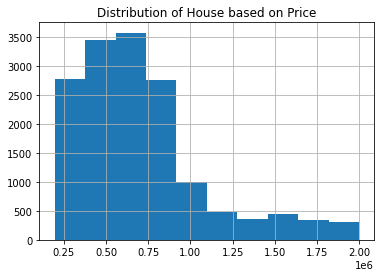

In [12]:
plt.title("Distribution of House based on Price")
df_new['price'].hist()

In [13]:
df_new.loc[(df_new['price']>=195000) & (df_new['price']<=500000), 'house_category'] = 0
df_new.loc[(df_new['price']>500000) & (df_new['price']<=755000), 'house_category'] = 1
df_new.loc[(df_new['price']>755000) & (df_new['price']<=2000000), 'house_category'] = 2

In [14]:
df_new.house_category.value_counts()

1.0    5253
0.0    5189
2.0    5032
Name: house_category, dtype: int64

In [15]:
df_new.to_csv('./dataset/house_price_labeled_data.csv', index=False)

<BarContainer object of 3 artists>

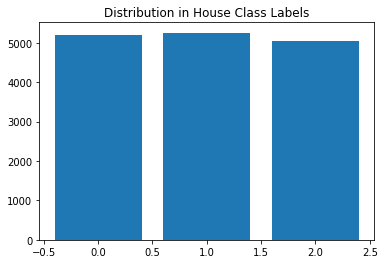

In [16]:
plt.title("Distribution in House Class Labels")
plt.bar(dict(Counter(df_new['house_category'])).keys(), dict(Counter(df_new['house_category'])).values())

# Data pre-processing

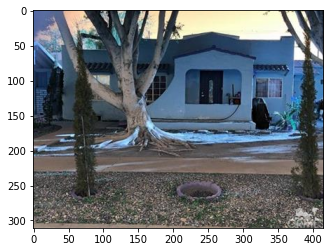

In [18]:
import cv2
sample=cv2.imread('./dataset/socal2/socal_pics/1.jpg')
plt.imshow(sample)

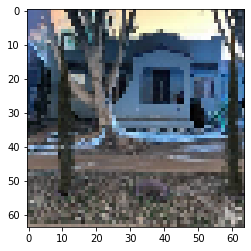

In [19]:
sample_resized=cv2.resize(sample,(64,64))
plt.imshow(sample_resized)

Reading images sequentially

In [20]:
import os
import cv2
cnt=0
images_path='./dataset/socal2/socal_pics'
X_house_images=np.zeros((15474,64,64,3),dtype='uint32')
for i in range(15474):

    sample=cv2.imread(images_path+'/'+str(i)+'.jpg')
    imgs=cv2.resize(sample,(64,64))
    X_house_images[cnt]=imgs
    cnt+=1

print("No. of images: ",cnt)

No. of images:  15474


In [21]:
X_house_images=X_house_images/255.0

# Splitting into training and test set

In [33]:
# X_house_images -> images
from sklearn.model_selection import train_test_split
Ximage_train,Ximage_test,Xatt_train,Xatt_test = train_test_split(X_house_images, X_house_attributes, test_size=0.25, random_state=42)
#Train_X, Test_X, Train_Y, Test_Y = train_test_split(tweets['normalized_tweet'],tweets['target'], test_size=0.25)

y_train , y_test = Xatt_train,Xatt_test

print(Ximage_train.shape)
print(Ximage_test.shape)
print(Xatt_train.shape)
print(Xatt_test.shape)



(11605, 64, 64, 3)
(3869, 64, 64, 3)
(11605, 1)
(3869, 1)


In [ ]:
# X_house_images -> images
from sklearn.model_selection import train_test_split
Ximage_train,Ximage_test,Xatt_train,Xatt_test = train_test_split(X_house_images, X_house_attributes, test_size=0.25, random_state=42)
#Train_X, Test_X, Train_Y, Test_Y = train_test_split(tweets['normalized_tweet'],tweets['target'], test_size=0.25)


# y_train , y_test = Xatt_train['price'].values , Xatt_test['price'].values
y_train , y_test = Xatt_train,Xatt_test

X2_train=Ximage_train
X2_test=Ximage_test

print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)


(11605, 64, 64, 3)
(3869, 64, 64, 3)
(11605, 1)
(3869, 1)


# Hyperparameter Tuning

**Learning Rate**

In [23]:
learning = 0.001

**Optimizer settings**

In [24]:
OPTIMIZER = [keras.optimizers.Adam(learning_rate= learning), 
             keras.optimizers.Nadam(learning_rate=learning),
             keras.optimizers.RMSprop(learning_rate= learning), 
             keras.optimizers.SGD(learning_rate= learning)]

**Loss Function**

In [25]:
LOSS = [keras.losses.MeanSquaredError(), 
        keras.losses.BinaryCrossentropy(), 
        keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction='auto')]

**Activation function**

In [26]:
ACTIVATION = ['relu', 'sigmoid', 'selu', 'elu', 'softmax']

In [ ]:
print(ACTIVATION[3])

elu


**Epochs Tuning**

In [28]:
EPOCHS = 50

# Define models

The CNN model will take images and return vector of dimension 4 which will indicate features

In [29]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    #inpute shape: (64,64,3)
    inputShape = (height, width, depth)
    chanDim = -1
    # define the model input
    inputs = Input(shape=inputShape)
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Conv2D(16, (3, 3), padding="same")(inputs)
    x = Activation(ACTIVATION[0])(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding="same")(x)
    x = Activation(ACTIVATION[0])(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = Activation(ACTIVATION[0])(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation(ACTIVATION[0])(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)

    x = Dense(4)(x)
    x = Activation(ACTIVATION[0])(x)
    # construct the CNN
    model = Model(inputs, x)
    # return the CNN
    return model

In [30]:
cnn = create_cnn(64, 64, 3, regress=False)
# create the input to our final set of layers as the *output* of CNN
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation=ACTIVATION[0])(cnn.output)
x = Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the images on the CNN input,
# outputting a single value (the predicted price of the house)

Model Compile

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
model = Model([cnn.input], outputs=x)
opt = keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / 200)
#acc=[keras.metrics.categorical_crossentropy()]
#model.compile(optimizer=OPTIMIZER[2],loss=LOSS[0], metrics=[keras.metrics.CategoricalAccuracy()])
model.compile(optimizer=opt,loss=LOSS[0], metrics=[keras.metrics.CategoricalAccuracy()])
# train the model
print("[INFO] training model...")

model.fit(x=[Ximage_train], y=y_train,validation_data=([Ximage_test], y_test),epochs=EPOCHS, batch_size=64)

[INFO] training model...
Epoch 1/50
182/182 [==============================] - 34s 20ms/step - loss: 634246791168.0000 - categorical_accuracy: 1.0000 - val_loss: 643147366400.0000 - val_categorical_accuracy: 1.0000
Epoch 2/50
182/182 [==============================] - 3s 18ms/step - loss: 634183286784.0000 - categorical_accuracy: 1.0000 - val_loss: 642986541056.0000 - val_categorical_accuracy: 1.0000
Epoch 3/50
182/182 [==============================] - 3s 17ms/step - loss: 633891782656.0000 - categorical_accuracy: 1.0000 - val_loss: 642375811072.0000 - val_categorical_accuracy: 1.0000
Epoch 4/50
182/182 [==============================] - 3s 18ms/step - loss: 633037651968.0000 - categorical_accuracy: 1.0000 - val_loss: 641288306688.0000 - val_categorical_accuracy: 1.0000
Epoch 5/50
182/182 [==============================] - 3s 18ms/step - loss: 631227940864.0000 - categorical_accuracy: 1.0000 - val_loss: 636906569728.0000 - val_categorical_accuracy: 1.0000
Epoch 6/50
182/182 [=========

# Prediction on a test data

In [35]:
attr_sample=df.loc[df_new['image_id'] == 7]
print(attr_sample)

   image_id   price
7         7  545000


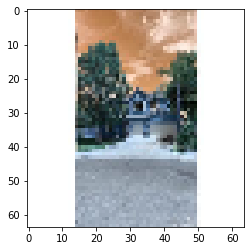

In [46]:
image_sample=cv2.imread('./dataset/socal2/socal_pics/7.jpg')
#image_sample=cv2.imread('./h-1.jpg')
sample_resized=cv2.resize(image_sample,(64,64))
plt.imshow(sample_resized)

Preprocessing the data so that the trained model can predict

In [47]:
X2_final=sample_resized/255.0

In [48]:
print(X2_final.shape)

(64, 64, 3)


In [49]:
y_pred=model.predict([np.reshape(X2_final,(1,64,64,3))])

In [50]:
print("Actual price: ",attr_sample['price'].values)
print("Predicted price: ",y_pred)

Actual price:  [545000]
Predicted price:  [[473191.7]]
